# Figures for Demo Slides

+ Validation of model performance
+ Summary of privacy policies

In [1]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Example of an App Policy

In [5]:
with open(os.path.join('../data/APP-350_v1.0/original_documents/', '10.html'), 'r') as f:
    policy_example = f.read()
    
print(re.sub(r'\<.*\>','',policy_example))





















var __FROM='';
var startTime = new Date().getTime();
      (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
      (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
      m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
      })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
      ga('create', 'UA-40488675-1', 'auto');
      ga('send', 'pageview');




  var __IE6=true;
  DD_belatedPNG.fix('#logo a,#header-wrap,#menus a span,.fullSlider img,.fullSlider .next,.fullSlider .prev,.fullSlider .navs a,#more,#more span,#banner .title,#banner .download a,#play,#banner .app,#banner .social a,#banner .social a span');





.entry table { width:100%; border-left:1px #ddd solid;border-top:1px #ddd solid;}
.entry th,.entry td {border-right:1px #ddd solid;border-bottom:1px #ddd solid; padding:5px;}
.entry th { background:#ED7501; color:#fff;}
.entry tr.first td { back

In [4]:
data_path = '../data/APP-350_v1.0/annotations/'
with open(os.path.join(data_path, 'policy_10.yml'), 'r') as f:
    annotated_example = f.read()
    
print(annotated_example)

policy_id: 10
policy_name: CheetahMobileBatteryDoctorBrowser
policy_type: TEST
contains_synthetic: false
segments:
- segment_id: 0
  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More
    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News
    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior
    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog
    Security Topics CEO Talks Press Release About Company Information Investor Relations
    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn
    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that
    privacy is significant. This Privacy Policy ("Policy") applies to your use of
    the Battery Doctor applications on all platforms (the "Application").
  annotations: []
  sentences: []
- segment_id: 1
  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy t

**Let's get a sense of how many annotations are present, what they address, and which practices are performed or not performed**

In [6]:
cols = ['PERFORMED','NOT_PERFORMED']
files = os.listdir(data_path)
policy_dict={}
for file in files:
    with open(os.path.join(data_path, file), 'r') as f:
        text = f.readlines()
    lc = 0
    prac_dict = {}
    for line in text:
        l = line.strip()
        if 'practice:' in l:
            prac_name = l.split(':')[1].strip()
            lm = text[lc+1].strip()
            mod_name = lm.split(':')[1].strip()
            #print(prac_name, mod_name)
            if prac_name in prac_dict:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name][0] += 1
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name][1] += 1
            else:
                if mod_name=='PERFORMED':
                    prac_dict[prac_name] = [1,0]
                if mod_name=='NOT_PERFORMED':
                    prac_dict[prac_name] = [0, 1]
        lc+=1
    policy_dict[file]=prac_dict

In [7]:
def performed_action(lst):
    try:
        return lst[0]
    except:
        return np.nan
    
def not_performed_action(lst):
    try:
        return lst[1]
    except:
        return np.nan

In [8]:
df_policies = pd.DataFrame(policy_dict)

df_performed = df_policies.copy()
df_not_performed = df_policies.copy()

for col in df_policies.columns:
    df_performed[col] = df_performed[col].apply(performed_action)
    df_not_performed[col] = df_not_performed[col].apply(not_performed_action)
    
performed_totals = (df_performed>0).sum(axis=1)
not_performed_totals = (df_not_performed>0).sum(axis=1)

df_totals = pd.DataFrame({'Performed': performed_totals, 'Not Performed': not_performed_totals})
df_totals.head()

,Performed,Not Performed
Identifier_Cookie_or_similar_Tech_1stParty,225,44
Identifier_IP_Address_1stParty,234,84
Identifier_Cookie_or_similar_Tech_3rdParty,168,37
Demographic_3rdParty,45,6
Demographic_Age_3rdParty,26,4


In [9]:
df_totals['Mentioned'] = df_totals['Performed'] + df_totals['Not Performed']
df_totals['Not Mentioned'] = 350 - df_totals['Mentioned'] 
df_totals.head()

,Performed,Not Performed,Mentioned,Not Mentioned
Identifier_Cookie_or_similar_Tech_1stParty,225,44,269,81
Identifier_IP_Address_1stParty,234,84,318,32
Identifier_Cookie_or_similar_Tech_3rdParty,168,37,205,145
Demographic_3rdParty,45,6,51,299
Demographic_Age_3rdParty,26,4,30,320


In [13]:
df_totals['Practice Name'] = df_totals.index.values
df_totals.head()

,Performed,Not Performed,Mentioned,Not Mentioned,Practice Name
Identifier_Cookie_or_similar_Tech_1stParty,225,44,269,81,Identifier_Cookie_or_similar_Tech_1stParty
Identifier_IP_Address_1stParty,234,84,318,32,Identifier_IP_Address_1stParty
Identifier_Cookie_or_similar_Tech_3rdParty,168,37,205,145,Identifier_Cookie_or_similar_Tech_3rdParty
Demographic_3rdParty,45,6,51,299,Demographic_3rdParty
Demographic_Age_3rdParty,26,4,30,320,Demographic_Age_3rdParty


In [16]:
df_totals = df_totals.reset_index(drop=True)[['Practice Name', 'Mentioned', 'Not Mentioned', 'Performed', 'Not Performed']]
df_totals.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed
0,Identifier_Cookie_or_similar_Tech_1stParty,269,81,225,44
1,Identifier_IP_Address_1stParty,318,32,234,84
2,Identifier_Cookie_or_similar_Tech_3rdParty,205,145,168,37
3,Demographic_3rdParty,51,299,45,6
4,Demographic_Age_3rdParty,30,320,26,4


In [23]:
df_totals['Type'] = df_totals['Practice Name'].apply(lambda x: x.split('_')[0])
df_totals.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed,Type
0,Identifier_Cookie_or_similar_Tech_1stParty,269,81,225,44,Identifier
1,Identifier_IP_Address_1stParty,318,32,234,84,Identifier
2,Identifier_Cookie_or_similar_Tech_3rdParty,205,145,168,37,Identifier
3,Demographic_3rdParty,51,299,45,6,Demographic
4,Demographic_Age_3rdParty,30,320,26,4,Demographic


In [41]:
df_totals.Type.unique()

array(['Identifier', 'Demographic', 'Contact', 'Facebook', 'SSO',
       'Location'], dtype=object)

In [98]:
[a.replace('_', ' ') for a in df_totals[df_totals.Type=='Contact']['Practice Name'].values]

['Contact E Mail Address 1stParty',
 'Contact Phone Number 1stParty',
 'Contact Postal Address 1stParty',
 'Contact Address Book 1stParty',
 'Contact Password 1stParty',
 'Contact E Mail Address 3rdParty',
 'Contact 1stParty',
 'Contact Postal Address 3rdParty',
 'Contact ZIP 1stParty',
 'Contact Phone Number 3rdParty',
 'Contact City 1stParty',
 'Contact Password 3rdParty',
 'Contact ZIP 3rdParty',
 'Contact 3rdParty',
 'Contact City 3rdParty',
 'Contact Address Book 3rdParty']

In [105]:
a = 2
if a:
    print(a)

2


In [108]:
b = ['This is one line', 'this is another', 'this is the last']

print('\n'.join(a for a in b))

This is one line
this is another
this is the last


In [99]:
[a.replace('_', ' ') for a in df_totals[df_totals.Type=='Location']['Practice Name'].values]

['Location 1stParty',
 'Location Cell Tower 1stParty',
 'Location IP Address 1stParty',
 'Location 3rdParty',
 'Location Cell Tower 3rdParty',
 'Location IP Address 3rdParty',
 'Location Bluetooth 1stParty',
 'Location Bluetooth 3rdParty',
 'Location GPS 1stParty',
 'Location GPS 3rdParty',
 'Location WiFi 1stParty',
 'Location WiFi 3rdParty']

In [100]:
[a.replace('_', ' ') for a in df_totals[df_totals.Type=='Demographic']['Practice Name'].values]

['Demographic 3rdParty',
 'Demographic Age 3rdParty',
 'Demographic Age 1stParty',
 'Demographic 1stParty',
 'Demographic Gender 1stParty',
 'Demographic Gender 3rdParty']

In [101]:
[a.replace('_', ' ') for a in df_totals[df_totals.Type=='Identifier']['Practice Name'].values]

['Identifier Cookie or similar Tech 1stParty',
 'Identifier IP Address 1stParty',
 'Identifier Cookie or similar Tech 3rdParty',
 'Identifier Ad ID 1stParty',
 'Identifier Device ID 1stParty',
 'Identifier IMEI 1stParty',
 'Identifier IMSI 1stParty',
 'Identifier SSID BSSID 1stParty',
 'Identifier IP Address 3rdParty',
 'Identifier MAC 1stParty',
 'Identifier 1stParty',
 'Identifier Mobile Carrier 1stParty',
 'Identifier 3rdParty',
 'Identifier SIM Serial 1stParty',
 'Identifier Device ID 3rdParty',
 'Identifier MAC 3rdParty',
 'Identifier Ad ID 3rdParty',
 'Identifier IMEI 3rdParty',
 'Identifier SIM Serial 3rdParty',
 'Identifier Mobile Carrier 3rdParty',
 'Identifier IMSI 3rdParty',
 'Identifier SSID BSSID 3rdParty']

In [102]:
[a.replace('_', ' ') for a in df_totals[df_totals.Type.isin(['SSO','Facebook'])]['Practice Name'].values]

['Facebook SSO', 'SSO']

<Figure size 432x288 with 0 Axes>

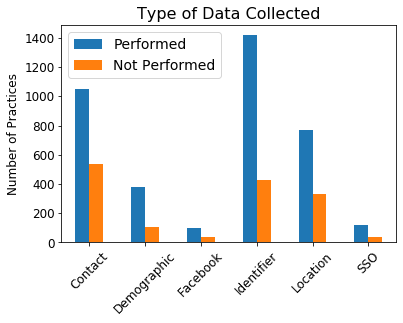

In [40]:
plt.figure()
df_totals.groupby('Type')[['Performed','Not Performed']].sum().plot(kind='bar',figsize=(6,4))
plt.ylabel('Number of Practices', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.title('Type of Data Collected', fontsize=16)
plt.show()

In [43]:
df_total_no_sso = df_totals[df_totals.Type.isin(['Identifier', 'Demographic', 'Contact','Location'])].copy()
df_total_no_sso.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed,Type
0,Identifier_Cookie_or_similar_Tech_1stParty,269,81,225,44,Identifier
1,Identifier_IP_Address_1stParty,318,32,234,84,Identifier
2,Identifier_Cookie_or_similar_Tech_3rdParty,205,145,168,37,Identifier
3,Demographic_3rdParty,51,299,45,6,Demographic
4,Demographic_Age_3rdParty,30,320,26,4,Demographic


In [46]:
df_total_no_sso['Practice Name'].apply(lambda x: x.split('_')[1]).unique()

array(['Cookie', 'IP', '3rdParty', 'Age', 'E', 'Phone', 'Postal',
       'Address', 'Password', '1stParty', 'Ad', 'Device', 'IMEI', 'IMSI',
       'SSID', 'Cell', 'MAC', 'Gender', 'Mobile', 'ZIP', 'Bluetooth',
       'GPS', 'WiFi', 'SIM', 'City'], dtype=object)

In [47]:
df_contact = df_totals[df_totals.Type=='Contact'].copy()
df_contact.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed,Type
5,Contact_E_Mail_Address_1stParty,387,-37,254,133,Contact
7,Contact_Phone_Number_1stParty,266,84,165,101,Contact
8,Contact_Postal_Address_1stParty,211,139,130,81,Contact
11,Contact_Address_Book_1stParty,120,230,85,35,Contact
12,Contact_Password_1stParty,152,198,102,50,Contact


In [49]:
df_contact['Party'] = df_contact['Practice Name'].apply(lambda x: x.split('_')[-1])
df_contact.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed,Type,Party
5,Contact_E_Mail_Address_1stParty,387,-37,254,133,Contact,1stParty
7,Contact_Phone_Number_1stParty,266,84,165,101,Contact,1stParty
8,Contact_Postal_Address_1stParty,211,139,130,81,Contact,1stParty
11,Contact_Address_Book_1stParty,120,230,85,35,Contact,1stParty
12,Contact_Password_1stParty,152,198,102,50,Contact,1stParty


In [55]:
df_contact['Data'] = df_contact['Practice Name'].apply(lambda x: ' '.join(x.split('_')[1:-1]))

In [56]:
df_contact.head()

,Practice Name,Mentioned,Not Mentioned,Performed,Not Performed,Type,Party,Data
5,Contact_E_Mail_Address_1stParty,387,-37,254,133,Contact,1stParty,E Mail Address
7,Contact_Phone_Number_1stParty,266,84,165,101,Contact,1stParty,Phone Number
8,Contact_Postal_Address_1stParty,211,139,130,81,Contact,1stParty,Postal Address
11,Contact_Address_Book_1stParty,120,230,85,35,Contact,1stParty,Address Book
12,Contact_Password_1stParty,152,198,102,50,Contact,1stParty,Password


In [61]:
df_contact.Data.unique()

array(['E Mail Address', 'Phone Number', 'Postal Address', 'Address Book',
       'Password', '', 'ZIP', 'City'], dtype=object)

In [63]:
prac_to_sum = ['E Mail Address', 'Phone Number', 'Postal Address', 'Address Book',
       'Password', 'ZIP', 'City']

In [57]:
cols_to_sum = ['Performed', 'Not Performed']

<Figure size 432x288 with 0 Axes>

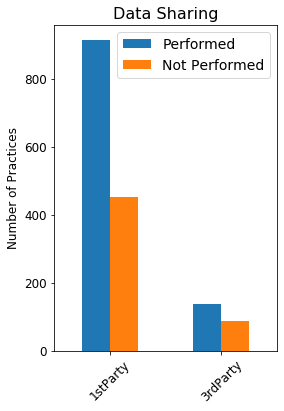

In [66]:
plt.figure()
df_contact.groupby('Party')[cols_to_sum].sum().plot(kind='bar', figsize=(4,6))
plt.ylabel('Number of Practices', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.title('Data Sharing', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

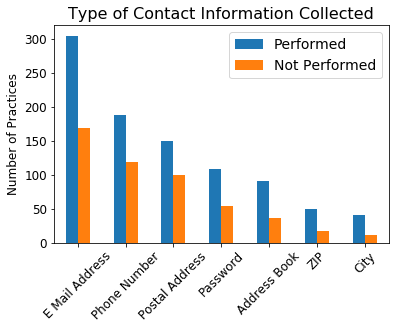

In [71]:
plt.figure()
df_contact[df_contact.Data.isin(prac_to_sum)].groupby('Data')[cols_to_sum].sum().sort_values(by='Performed', ascending=False).plot(kind='bar',figsize=(6,4))
plt.ylabel('Number of Practices', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.title('Type of Contact Information Collected', fontsize=16)
plt.show()

## Precision-Recall Curves

In [72]:
# threshold, prec, rec, f1
bigram = {0.25:[.552,.274],
          0.5:[.671,.224],
          0.75:[.726,.189]}

feat_cutoff = {0.25:[.594,.325],
          0.5:[.663,.266],
          0.75:[.729,.201]}

tfidf = {0.25:[.621,.3],
          0.5:[.786,.2],
          0.75:[.878,.118]}

stopwords = {0.25:[.433,.28],
          0.5:[.474,.219],
          0.75:[.57,.172]}

In [74]:
stopwords[.25]

[0.433, 0.28]

In [75]:
def get_prec_rec(result_dict):
    precision = [] # y
    recall = [] # x
    for thres in [.25, .5, .75]:
        precision.append(result_dict[thres][0])
        recall.append(result_dict[thres][1])
    return recall, precision

In [77]:
x_bi, y_bi = get_prec_rec(bigram)
x_feat, y_feat = get_prec_rec(feat_cutoff)
x_tf, y_tf = get_prec_rec(tfidf)
x_stop, y_stop = get_prec_rec(stopwords)

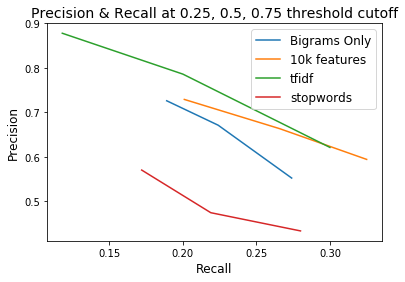

In [90]:
plt.figure()
plt.plot(x_bi, y_bi, label='Bigrams Only')
plt.plot(x_feat, y_feat, label='10k features')
plt.plot(x_tf, y_tf, label='tfidf')
plt.plot(x_stop, y_stop, label='stopwords')
plt.legend(fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Recall', fontsize=12)
plt.title('Precision & Recall at 0.25, 0.5, 0.75 threshold cutoff', fontsize=14)
plt.show()